In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'Movies.csv')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


In [8]:
obj=df.select_dtypes(['object'])
obj

,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,147 min,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,142 min,"Drama, Romance, War","1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,82 min,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...
15493,Zubaan,115 min,Drama,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,153 min,"Biography, Drama, History","1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,125 min,"Action, Crime, Drama",44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,129 min,"Action, Drama",655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [9]:
num=df.select_dtypes(['int','float64'])
num

,Year,Rating
1,-2019.0,7.0
3,-2019.0,4.4
5,-1997.0,4.7
6,-2005.0,7.4
8,-2012.0,5.6
...,...,...
15493,-2015.0,6.1
15494,-2001.0,6.2
15503,-1989.0,5.8
15505,-1999.0,4.5


Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
for i in obj:
    obj[i]=le.fit_transform(obj[i])
obj

,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,9,229,1843,629,1352,2272,319
3,1,10,184,1165,1335,1198,719,2148
5,3,47,157,1892,1530,378,75,2045
6,4,42,289,36,2044,692,1112,2524
8,76,156,320,1134,135,1934,1175,1013
...,...,...,...,...,...,...,...,...
15493,5380,15,229,1312,1223,1861,1801,1615
15494,5381,53,133,182,2059,763,1619,1184
15503,5382,25,28,1348,1793,406,754,1685
15505,5384,29,38,1681,1025,112,2164,314


In [12]:
df_new=pd.concat([num,obj],axis=1)
df_new

,Year,Rating,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,7.0,0,9,229,1843,629,1352,2272,319
3,-2019.0,4.4,1,10,184,1165,1335,1198,719,2148
5,-1997.0,4.7,3,47,157,1892,1530,378,75,2045
6,-2005.0,7.4,4,42,289,36,2044,692,1112,2524
8,-2012.0,5.6,76,156,320,1134,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...,...
15493,-2015.0,6.1,5380,15,229,1312,1223,1861,1801,1615
15494,-2001.0,6.2,5381,53,133,182,2059,763,1619,1184
15503,-1989.0,5.8,5382,25,28,1348,1793,406,754,1685
15505,-1999.0,4.5,5384,29,38,1681,1025,112,2164,314


In [13]:
df_new.drop(['Year'],axis=1,inplace=True)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    5659 non-null   float64
 1   Name      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   int32  
 4   Votes     5659 non-null   int32  
 5   Director  5659 non-null   int32  
 6   Actor 1   5659 non-null   int32  
 7   Actor 2   5659 non-null   int32  
 8   Actor 3   5659 non-null   int32  
dtypes: float64(1), int32(8)
memory usage: 265.3 KB


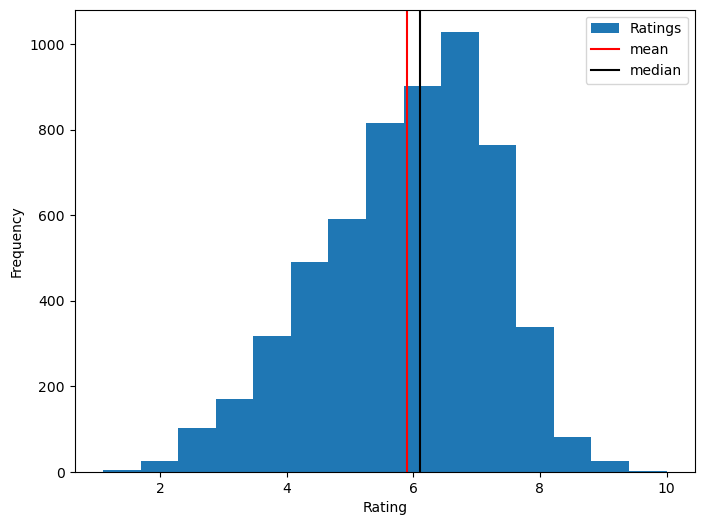

In [15]:
plt.figure(figsize=(8,6))
plt.hist(df_new['Rating'],bins=15,label='Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df_new['Rating'].mean(),color='red',label='mean')
plt.axvline(df_new['Rating'].median(),color='black',label='median')
plt.legend()
plt.show()

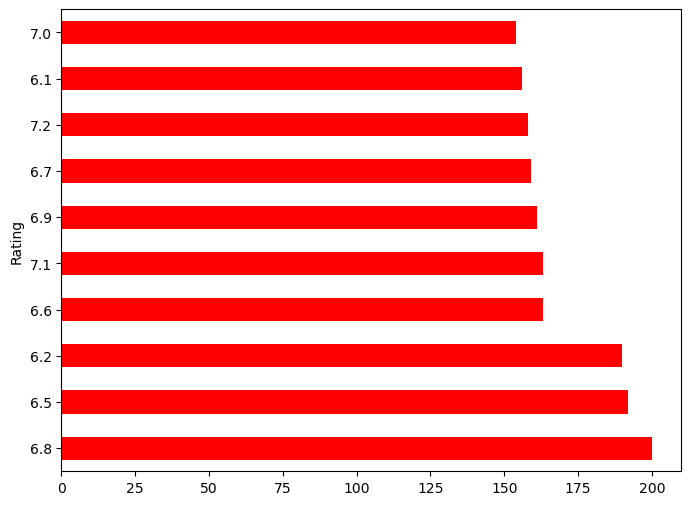

In [16]:
plt.figure(figsize=(8,6))
df_new['Rating'].value_counts().head(10).plot(kind='barh', color='red')
plt.show()

In [17]:
df_new.corr()

,Rating,Name,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
Rating,1.000000,0.000771,0.078761,0.121796,0.040630,-0.006824,0.023430,0.041353,0.042413
Name,0.000771,1.000000,-0.000381,0.007046,-0.001721,-0.008213,0.022061,0.002465,0.004073
Duration,0.078761,-0.000381,1.000000,0.021134,-0.013365,-0.001212,-0.016749,0.010311,-0.027461
Genre,0.121796,0.007046,0.021134,1.000000,-0.001320,-0.017921,0.042745,0.028168,0.007474
Votes,0.040630,-0.001721,-0.013365,-0.001320,1.000000,0.028163,-0.001337,0.000050,-0.019281
Director,-0.006824,-0.008213,-0.001212,-0.017921,0.028163,1.000000,0.022918,0.018039,0.017915
Actor 1,0.023430,0.022061,-0.016749,0.042745,-0.001337,0.022918,1.000000,-0.000642,0.013170
Actor 2,0.041353,0.002465,0.010311,0.028168,0.000050,0.018039,-0.000642,1.000000,0.010439
Actor 3,0.042413,0.004073,-0.027461,0.007474,-0.019281,0.017915,0.013170,0.010439,1.000000


<Axes: xlabel='Rating', ylabel='Votes'>

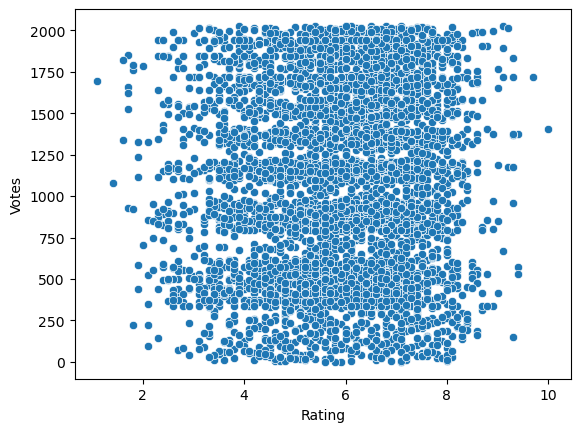

In [18]:
sns.scatterplot(data=df_new,x='Rating', y='Votes')

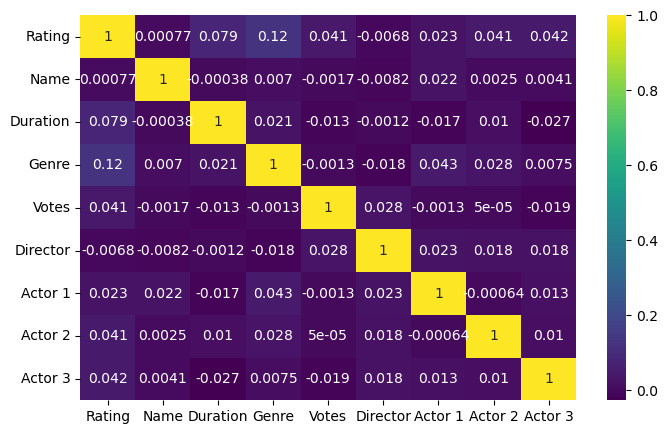

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df_new.corr(),annot=True,cmap='viridis')
plt.show()

Data Scaling

In [20]:
x=df_new[['Genre','Duration','Votes','Director','Actor 1','Actor 2','Actor 3']]
y=df_new['Rating']

In [21]:
x

,Genre,Duration,Votes,Director,Actor 1,Actor 2,Actor 3
1,229,9,1843,629,1352,2272,319
3,184,10,1165,1335,1198,719,2148
5,157,47,1892,1530,378,75,2045
6,289,42,36,2044,692,1112,2524
8,320,156,1134,135,1934,1175,1013
...,...,...,...,...,...,...,...
15493,229,15,1312,1223,1861,1801,1615
15494,133,53,182,2059,763,1619,1184
15503,28,25,1348,1793,406,754,1685
15505,38,29,1681,1025,112,2164,314


In [22]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
std=sc.fit_transform(x)

In [25]:
print(std)

[[ 0.52931791 -0.99753391  1.43549689 ...  0.6816723   1.63359215
  -1.32934107]
 [ 0.11341838 -0.97302839  0.20375098 ...  0.40902916 -0.69552904
   1.21099562]
 [-0.13612133 -0.06632385  1.52451688 ... -1.04270705 -1.66137196
   1.06793675]
 ...
 [-1.32836665 -0.60544547  0.53621337 ... -0.99313557 -0.64303758
   0.56792515]
 [-1.23594453 -0.50742335  1.14118592 ... -1.51363611  1.47161849
  -1.33628568]
 [-1.23594453 -0.48291783 -0.47207421 ... -0.88337015 -0.64453734
  -1.35156381]]


In [26]:
x=std

In [27]:
x

array([[ 0.52931791, -0.99753391,  1.43549689, ...,  0.6816723 ,
         1.63359215, -1.32934107],
       [ 0.11341838, -0.97302839,  0.20375098, ...,  0.40902916,
        -0.69552904,  1.21099562],
       [-0.13612133, -0.06632385,  1.52451688, ..., -1.04270705,
        -1.66137196,  1.06793675],
       ...,
       [-1.32836665, -0.60544547,  0.53621337, ..., -0.99313557,
        -0.64303758,  0.56792515],
       [-1.23594453, -0.50742335,  1.14118592, ..., -1.51363611,
         1.47161849, -1.33628568],
       [-1.23594453, -0.48291783, -0.47207421, ..., -0.88337015,
        -0.64453734, -1.35156381]])

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [29]:
print(x.shape,xtrain.shape,xtest.shape)

(5659, 7) (4244, 7) (1415, 7)


Model Building

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, classification_report, accuracy_score
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
trnpred=linreg.predict(xtrain)
ypred=linreg.predict(xtest)
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
r2 = r2_score(ytest,ypred)

RMSE_trn=(np.sqrt(mean_squared_error(ytrain,trnpred)))
RMSE_test=(np.sqrt(mse))
print("RMSE TrainData = ",str(RMSE_trn))
print("RMSE TestData = ",str(RMSE_test))
print('-'*45)
print('RSquared value on train:',linreg.score(xtrain, ytrain))
print('RSquared value on test:',linreg.score(xtest, ytest))
print('-'*45)
print(f"MAE:- {mae}\nMSE:- {mse}\nAccuracy :- {r2}")

RMSE TrainData =  1.366602761771349
RMSE TestData =  1.3529212746502624
---------------------------------------------
RSquared value on train: 0.026294407723110647
RSquared value on test: 0.023116283933336534
---------------------------------------------
MAE:- 1.0872814162543032
MSE:- 1.8303959754012906
Accuracy :- 0.023116283933336534


In [31]:
errors=abs(ypred-ytest)
mape= (errors/ytest)*100
accuracy=100-np.mean(mape)
print('Linreg Accuracy : ',round(accuracy,2),'%')

Linreg Accuracy :  77.55 %


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(xtrain,ytrain)
trnpred1=DT.predict(xtrain)
ypred1=DT.predict(xtest)
mae1 = mean_absolute_error(ytest,ypred1)
mse1 = mean_squared_error(ytest,ypred1)

RMSE_trn=(np.sqrt(mean_squared_error(ytrain,trnpred1)))
RMSE_test=(np.sqrt(mse1))
print("RMSE TrainData = ",str(RMSE_trn))
print("RMSE TestData = ",str(RMSE_test))
print('-'*45)
print('RSquared value on train:',DT.score(xtrain, ytrain))
print('RSquared value on test:',DT.score(xtest, ytest))
print('-'*45)
print(f"MAE:- {mae1}\n MSE:- {mse1}")

RMSE TrainData =  1.1192814096330665
RMSE TestData =  1.4706810944295863
---------------------------------------------
RSquared value on train: 0.3468368764331038
RSquared value on test: -0.1543429032726653
---------------------------------------------
MAE:- 1.1359512149843793
 MSE:- 2.1629028815126055


In [33]:
errors=abs(ypred1-ytest)
mape= (errors/ytest)*100
accuracy1=100-np.mean(mape)
print('DT Accuracy : ',round(accuracy1,2),'%')

DT Accuracy :  76.85 %


RandomForest

In [34]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(xtrain,ytrain)
trnpred2=RF.predict(xtrain)
ypred2=RF.predict(xtest)
mae2 = mean_absolute_error(ytest,ypred2)
mse2 = mean_squared_error(ytest,ypred2)

RMSE_trn=(np.sqrt(mean_squared_error(ytrain,trnpred2)))
RMSE_test=(np.sqrt(mse2))
print("RMSE TrainData = ",str(RMSE_trn))
print("RMSE TestData = ",str(RMSE_test))
print('-'*45)
print('RSquared value on train:',RF.score(xtrain, ytrain))
print('RSquared value on test:',RF.score(xtest, ytest))
print('-'*45)
print(f"MAE:- {mae2}\n MSE:- {mse2}")

RMSE TrainData =  0.4936425927987481
RMSE TestData =  1.3177828976622152
---------------------------------------------
RSquared value on train: 0.8729518558078277
RSquared value on test: 0.07320100978376809
---------------------------------------------
MAE:- 1.0370572438162544
 MSE:- 1.7365517653710245


In [35]:
errors=abs(ypred2-ytest)
mape= (errors/ytest)*100
accuracy2=100-np.mean(mape)
print('RF Accuracy : ',round(accuracy2,2),'%')

RF Accuracy :  78.76 %


In [36]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=10).fit(xtrain, ytrain)
trnpred3=lasso.predict(xtrain)
ypred3=lasso.predict(xtest)
mae3 = mean_absolute_error(ytest,ypred3)
mse3 = mean_squared_error(ytest,ypred3)

RMSE_trn=(np.sqrt(mean_squared_error(ytrain,trnpred3)))
RMSE_test=(np.sqrt(mse3))
print("RMSE TrainData = ",str(RMSE_trn))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',lasso.score(xtrain, ytrain))
print('RSquared value on test:',lasso.score(xtest, ytest))
print('-'*50)
print(f"MAE:- {mae3}\n MSE:- {mse3}")

RMSE TrainData =  1.3666609468608872
RMSE TestData =  1.353304360147412
--------------------------------------------------
RSquared value on train: 0.02621149210967466
RSquared value on test: 0.02256298793089051
--------------------------------------------------
MAE:- 1.0879472530085716
 MSE:- 1.831432691193996


In [37]:
errors=abs(ypred3-ytest)
mape= (errors/ytest)*100
accuracy3=100-np.mean(mape)
print('Lasso Accuracy : ',round(accuracy3,2),'%')

Lasso Accuracy :  77.54 %


Create Dataframe

In [38]:
Newdf=pd.DataFrame({'Model':('Linear regression','Decision Tree','Random Forest','Lasso'),'Accuracy':(accuracy,accuracy1,accuracy2,accuracy3)})
Newdf

,Model,Accuracy
0,Linear regression,77.552911
1,Decision Tree,76.853744
2,Random Forest,78.764733
3,Lasso,77.537172


From the following we can get the best accuracy and We can find Random Forest as best Model to implement